In [1]:
import os
import sys
import numpy as np
import pandas as pd

import rocks

rocks.set_log_level("error")

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import figure_setup as fs

# You need SKA somewhere: https://github.com/bcarry/ska
# sys.path.append("/home/bcarry/Documents/softs/")
# from ska import tools as skatools

# Get ZTF fit

In [2]:
# Local Configuration
data_fink = "../"
bft_file = os.path.join(data_fink, "data", "ssoBFT-latest.parquet")

In [3]:
# Threshold for selection (of non-zero values)
thres = 1e-3

# Minimum phase angle to consider
min_phase = 3

In [4]:
# ZTF filters 1: g, 2: r
filters = {"1": "g", "2": "r"}

fink_colors = ["#15284F", "#F5622E"]


In [5]:
data = pd.read_parquet(os.path.join(data_fink, "data", "ztf", "sso_ZTF.parquet"))

In [6]:
data["sHG1G2_dSpin"] = np.sqrt(
    (data["sHG1G2_dalpha0"] * np.cos(np.radians(data["sHG1G2_delta0"]))) ** 2
    + data["sHG1G2_ddelta0"] ** 2
)


# # Remove solutions above 90 deg of latitude
cond = data.sHG1G2_delta0 > 90
data.loc[cond, "sHG1G2_delta0"] = 90
print(f"above 90: {len(data[cond])} ")

cond = data.sHG1G2_delta0 < -90
data.loc[cond, "sHG1G2_delta0"] = -90
print(f"below 90: {len(data[cond])} ")

above 90: 0 
below 90: 0 


In [7]:
bft = pd.read_parquet(bft_file)

In [11]:
bft.columns[ bft.columns.str.contains(r'^(?=.*color)(?=.*value)') ]

Index(['colors.g-i.color.value', 'colors.g-r.color.value',
       'colors.g-z.color.value', 'colors.i-z.color.value',
       'colors.r-i.color.value', 'colors.r-z.color.value',
       'colors.u-g.color.value', 'colors.u-i.color.value',
       'colors.u-r.color.value', 'colors.J-K.color.value',
       'colors.Y-J.color.value', 'colors.Y-K.color.value',
       'colors.c-o.color.value', 'colors.u-z.color.value',
       'colors.v-g.color.value', 'colors.v-i.color.value',
       'colors.v-r.color.value', 'colors.v-z.color.value',
       'colors.H-K.color.value', 'colors.J-H.color.value',
       'colors.Y-H.color.value', 'colors.u-v.color.value',
       'colors.V-I.color.value', 'colors.V-R.color.value',
       'colors.B-V.color.value', 'colors.R-I.color.value',
       'colors.B-R.color.value', 'colors.V-Z.color.value',
       'colors.Z-J.color.value', 'colors.U-B.color.value'],
      dtype='object')

In [12]:
cols = [
    "sso_number",
    "sso_name",
    "sso_class",
    "orbital_elements.semi_major_axis.value",
    "orbital_elements.eccentricity.value",
    "orbital_elements.inclination.value",
    "orbital_elements.node_longitude.value",
    "orbital_elements.perihelion_argument.value",
    "orbital_elements.mean_anomaly.value",
    "orbital_elements.mean_motion.value",
    "family.family_number",
    "family.family_name",
    "proper_elements.proper_semi_major_axis.value",
    "proper_elements.proper_eccentricity.value",
    "proper_elements.proper_inclination.value",
    "proper_elements.proper_sine_inclination.value",
    "tisserand_parameters.Jupiter.value",
    "albedo.value",
    "absolute_magnitude.value",
    "diameter.value",
    "taxonomy.class",
    "taxonomy.complex",
    "taxonomy.waverange",
    "taxonomy.scheme",
    "taxonomy.technique",
    "colors.c-o.color.value",
    "colors.c-o.color.error.min",
    "colors.c-o.color.error.max",
    "colors.c-o.facility",
    "colors.c-o.observer",
    "colors.c-o.epoch",
    "colors.c-o.delta_time",
    "colors.c-o.id_filter_1",
    "colors.c-o.id_filter_2",
    "colors.c-o.phot_sys",
    "colors.c-o.technique",
    "colors.g-r.color.value",
    "colors.g-r.color.error.min",
    "colors.g-r.color.error.max",
    "colors.g-r.facility",
    "colors.g-r.observer",
    "colors.g-r.epoch",
    "colors.g-r.delta_time",
    "colors.g-r.id_filter_1",
    "colors.g-r.id_filter_2",
    "colors.g-r.phot_sys",
    "colors.g-r.technique",
    "colors.g-i.color.value",
    "colors.g-i.color.error.min",
    "colors.g-i.color.error.max",
    "colors.g-i.facility",
    "colors.g-i.observer",
    "colors.g-i.epoch",
    "colors.g-i.delta_time",
    "colors.g-i.id_filter_1",
    "colors.g-i.id_filter_2",
    "colors.g-i.phot_sys",
    "colors.g-i.technique",
    "colors.i-z.color.value",
    "colors.i-z.color.error.min",
    "colors.i-z.color.error.max",
    "colors.i-z.facility",
    "colors.i-z.observer",
    "colors.i-z.epoch",
    "colors.i-z.delta_time",
    "colors.i-z.id_filter_1",
    "colors.i-z.id_filter_2",
    "colors.i-z.phot_sys",
    "colors.i-z.technique",
    "spins.1.obliquity",
    "spins.1.RA0.value",
    "spins.1.DEC0.value",
    "spins.1.RA0.error.max",
    "spins.1.DEC0.error.max",
    "spins.1.long.value",
    "spins.1.lat.value",
    "spins.1.technique",
    "spins.2.obliquity",
    "spins.2.RA0.value",
    "spins.2.DEC0.value",
    "spins.2.RA0.error.max",
    "spins.2.DEC0.error.max",
    "spins.2.long.value",
    "spins.2.lat.value",
    "spins.2.technique",
    "spins.3.obliquity",
    "spins.3.RA0.value",
    "spins.3.DEC0.value",
    "spins.3.RA0.error.max",
    "spins.3.DEC0.error.max",
    "spins.3.long.value",
    "spins.3.lat.value",
    "spins.3.technique",
    "spins.4.obliquity",
    "spins.4.RA0.value",
    "spins.4.DEC0.value",
    "spins.4.RA0.error.max",
    "spins.4.DEC0.error.max",
    "spins.4.long.value",
    "spins.4.lat.value",
    "spins.4.technique",
]

In [13]:
data = data.merge(bft[cols], left_on="name", right_on="sso_name", how="left")

In [14]:
# data

In [15]:
thres = 1e-3

# HG Parameeter
mask_HG_g = (data.HG_H_g.notna()) & (data.HG_G_g.notna())
mask_HG_r = (data.HG_H_r.notna()) & (data.HG_G_r.notna())
mask_HG_fit = (data.HG_fit == 0) & (data.HG_status >= 2)
mask_HG = mask_HG_g & mask_HG_r & mask_HG_fit

# HG1G2 parameters
mask_HG1G2_g = (
    (data.HG1G2_G1_g > thres)
    & (data.HG1G2_G2_g > thres)
    & ((1 - data.HG1G2_G1_g - data.HG1G2_G2_g) > thres)
)
mask_HG1G2_r = (
    (data.HG1G2_G1_r > thres)
    & (data.HG1G2_G2_r > thres)
    & ((1 - data.HG1G2_G1_r - data.HG1G2_G2_r) > thres)
)
mask_HG1G2_fit = (data.HG1G2_fit == 0) & (data.HG1G2_status >= 2)
mask_HG1G2 = mask_HG1G2_fit & mask_HG1G2_g & mask_HG1G2_r

# SHG1G2 ZTF
mask_sHG1G2_g = (
    (data.sHG1G2_G1_g > thres)
    & (data.sHG1G2_G2_g > thres)
    & ((1 - data.sHG1G2_G1_g - data.sHG1G2_G2_g) > thres)
)
mask_sHG1G2_r = (
    (data.sHG1G2_G1_r > thres)
    & (data.sHG1G2_G2_r > thres)
    & ((1 - data.sHG1G2_G1_r - data.sHG1G2_G2_r) > thres)
)
mask_sHG1G2_ZTF = mask_sHG1G2_g & mask_sHG1G2_r
mask_sHG1G2_fit = (data.sHG1G2_fit == 0) & (data.sHG1G2_status >= 2)
mask_sHG1G2 = mask_sHG1G2_fit & mask_sHG1G2_ZTF

# Oblateness
mask_R = (data.sHG1G2_R>0.3)

# Spin solution suspicous: RA=={0,180,360}, DEC==0
maskSpin = (
    (data.sHG1G2_alpha0 > thres)
    & (np.abs(360 - data.sHG1G2_alpha0) > thres)
    & (np.abs(data.sHG1G2_alpha0 - 180) > thres)
    & (np.abs(data.sHG1G2_delta0) > thres)
)

# FINK Sample
maskFINK = mask_sHG1G2 & mask_R & maskSpin

# Phase coverage
maskPhase = data.minphase < 2.5

# Global mask
mask = mask_HG1G2 & mask_sHG1G2


print(f" All data       : {len(data):6d}  ({100:>6.2f}%)")
print()
print(
    f"  Mask HG g      : {len(data[mask_HG_g]):6d}  ({100.*len(data[mask_HG_g])/len(data):>6.2f}%)"
)
print(
    f"  Mask HG r      : {len(data[mask_HG_r]):6d}  ({100.*len(data[mask_HG_r])/len(data):>6.2f}%)"
)
print(
    f"  Mask HG g+r    : {len(data[mask_HG]):6d}  ({100.*len(data[mask_HG])/len(data):>6.2f}%)"
)
print()
print(
    f"  Mask HG1G2 g   : {len(data[mask_HG1G2_g]):6d}  ({100.*len(data[mask_HG1G2_g])/len(data):>6.2f}%)"
)
print(
    f"  Mask HG1G2 r   : {len(data[mask_HG1G2_r]):6d}  ({100.*len(data[mask_HG1G2_r])/len(data):>6.2f}%)"
)
print(
    f"  Mask HG1G2 g+r : {len(data[mask_HG1G2]):6d}  ({100.*len(data[mask_HG1G2])/len(data):>6.2f}%)"
)
print()
print(
    f"  Mask SHG1G2 g  : {len(data[mask_sHG1G2_g]):6d}  ({100.*len(data[mask_sHG1G2_g])/len(data):>6.2f}%)"
)
print(
    f"  Mask SHG1G2 r  : {len(data[mask_sHG1G2_r]):6d}  ({100.*len(data[mask_sHG1G2_r])/len(data):>6.2f}%)"
)
print(
    f"  Mask SHG1G2 g+r: {len(data[mask_sHG1G2]):6d}  ({100.*len(data[mask_sHG1G2])/len(data):>6.2f}%)"
)
print()
print(
    f"  Mask Oblateness: {len(data[mask_R]):6d}  ({100.*len(data[mask_R])/len(data):>6.2f}%)"
)
print(
    f"  Mask Spin      : {len(data[maskSpin]):6d}  ({100.*len(data[maskSpin])/len(data):>6.2f}%)"
)
print()
print(
    f"  Mask FINK      : {len(data[maskFINK]):6d}  ({100.*len(data[maskFINK])/len(data):>6.2f}%)"
)
print()
print(
    f"  Mask (both)    : {len(data[mask]):6d}  ({100.*len(data[mask])/len(data):>6.2f}%)"
)
for minphase in [2, 3, 4, 5]:
    maskPhase = data.minphase < minphase
    print(
        f"  Mask phase {minphase}  : {len(data[maskPhase]):6d}  ({100.*len(data[maskPhase])/len(data):>6.2f}%)"
    )


# len(data), len(data[mask]), len(data[mask_HG1G2]), len(data[mask_HG1G2sp]), len(data[mask_sHG1G2_g]), len(data[mask_sHG1G2_r]), len(data[mask_sHG1G2])

 All data       : 115147  (100.00%)

  Mask HG g      : 114904  ( 99.79%)
  Mask HG r      : 114906  ( 99.79%)
  Mask HG g+r    : 112564  ( 97.76%)

  Mask HG1G2 g   :  56815  ( 49.34%)
  Mask HG1G2 r   :  62043  ( 53.88%)
  Mask HG1G2 g+r :  40727  ( 35.37%)

  Mask SHG1G2 g  :  70736  ( 61.43%)
  Mask SHG1G2 r  :  75544  ( 65.61%)
  Mask SHG1G2 g+r:  55579  ( 48.27%)

  Mask Oblateness:  80317  ( 69.75%)
  Mask Spin      : 111357  ( 96.71%)

  Mask FINK      :  42531  ( 36.94%)

  Mask (both)    :  34691  ( 30.13%)
  Mask phase 2  :  57515  ( 49.95%)
  Mask phase 3  :  79455  ( 69.00%)
  Mask phase 4  :  93564  ( 81.26%)
  Mask phase 5  : 101933  ( 88.52%)


# Color

In [16]:
def color_conv_ztf_panstarrs(filter, g_minus_r):
    """
    Return mag_ztf - mag_PS in g or r
    Medford 2020
    DOI 10.3847/2515-5172/ab7f3c
    """
    if filter == "g":
        return 0.055 * (g_minus_r) - 0.012
    else:
        return -0.087 * (g_minus_r) - 0.0035

In [17]:
def color_conv_panstarrs_sdss(filter, g_minus_i):
    """
    Return mag_PS - mag_SDSS in g or r
    Medford 2020
    DOI 10.3847/2515-5172/ab7f3c
    """
    if filter == "g":
        a0, a1, a2, a3 = -0.01808, -0.13595, 0.01941, -0.00183
    elif filter == "r":
        a0, a1, a2, a3 = -0.01836, -0.03577, 0.02612, -0.00558
    else:
        print("aie")

    return a0 + a1 * g_minus_i + a2 * g_minus_i**2 + a3 * g_minus_i**3

In [18]:
def color_conv_skymapper_sdss(color, value):
    """
    Return mag_skymapper - mag_sdss in g or r
    Medford 2020
    DOI 10.3847/2515-5172/ab7f3c
    """
    if color == "g-r":
        return 1.46534 * value + 0.027855
        
    if color == "g-i":
        return 1.171337 * value + 0.06685

    else:
        print("sm sdss aie")

# gr vs SDSS and SkyMapper

In [60]:
# ----------------------------------------------------------------------
fig, ax = plt.subplots(
    2,
    1,
    figsize=fs.figsize(0.5, aspect=1.2),
    sharex=True,
    sharey=True,
    gridspec_kw={
        "wspace": 0.02,
        "hspace": 0.02,
        "top": 0.98,
        "bottom": 0.1,
        "left": 0.1,
        "right": 0.98,
    },
)


# ----------------------------------------------------------------------
# Parameters for histograms
r = [[0.05, 0.95], [0.05, 0.95]]
b = 30
xTxt, yTxt = 0.05, 0.85
lim_dH = 7.7
vmin, vmax = 0, 150

# ----------------------------------------------------------------------
# SDSS

# Select sample
cond = (
    maskFINK
    & (np.sqrt(data["sHG1G2_dH_g"] ** 2 + data["sHG1G2_dH_r"] ** 2) < lim_dH)
    & (data["colors.g-r.facility"] == "SDSS")
    & (data["colors.g-r.color.value"].notna())
    & (data["colors.g-i.facility"] == "SDSS")
    & (data["colors.g-i.color.value"].notna())
)

# Define x/y
x = data.loc[cond, "sHG1G2_H_g"] - data.loc[cond, "sHG1G2_H_r"]
y = data.loc[cond, "colors.g-r.color.value"]
y_gi = data.loc[cond, "colors.g-i.color.value"]
ax[0].text(xTxt, yTxt, f"{len(data[cond])} SSOs", transform=ax[0].transAxes)

# Convert to PanSTARRS
dmag_g = color_conv_ztf_panstarrs("g", x)
dmag_r = color_conv_ztf_panstarrs("r", x)
x2 = x - (dmag_g - dmag_r)

dmag_g = color_conv_panstarrs_sdss("g", y_gi)
dmag_r = color_conv_panstarrs_sdss("r", y_gi)
y2 = y + (dmag_g - dmag_r)

# Plot 2d Histo
_, _, _, im_sdss = ax[0].hist2d(
    x2, y2, range=r, bins=b, cmap="hot_r", vmin=vmin, vmax=vmax, rasterized=True
)

# Colorbar
axins = inset_axes(
    ax[0],
    width="50%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="lower right",
)
cbar_sdss = fig.colorbar(im_sdss, cax=axins, orientation="horizontal")
cbar_sdss.ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)


# ----------------------------------------------------------------------
# SkyMapper
# Select sample
cond = (
    maskFINK
    & (np.sqrt(data["sHG1G2_dH_g"] ** 2 + data["sHG1G2_dH_r"] ** 2) < lim_dH)
    & (data["colors.g-r.facility"] == "SMSS")
    & (data["colors.g-r.color.value"].notna())
)

# Define x/y
x = data.loc[cond, "sHG1G2_H_g"] - data.loc[cond, "sHG1G2_H_r"]
y = data.loc[cond, "colors.g-r.color.value"]
ax[1].text(xTxt, yTxt, f"{len(data[cond])} SSOs", transform=ax[1].transAxes)

# Convert to PanSTARRS
dmag_g = color_conv_ztf_panstarrs("g", x)
dmag_r = color_conv_ztf_panstarrs("r", x)
x2 = x - (dmag_g - dmag_r)

y_sdss = color_conv_skymapper_sdss("g-r", y)
dmag_g = color_conv_panstarrs_sdss("g", data.loc[cond, "colors.g-i.color.value"])
dmag_r = color_conv_panstarrs_sdss("r", data.loc[cond, "colors.g-i.color.value"])
y2 = y_sdss + (dmag_g - dmag_r)

# Plot histogram
ax[1].hist2d(
    x2, y2, range=r, bins=b, cmap="hot_r", vmin=vmin, vmax=vmax, rasterized=True
)


# ----------------------------------------------------------------------
# Axes
ax[0].set_ylabel("SDSS g-r")
ax[1].set_ylabel("SkyMapper g-r")
ax[1].set_xlabel("ZTF H$_g$-H$_r$
                 
xx = np.linspace(0, 1, num=10)
for a in ax[:].ravel():
    a.set_xlim(r[0][0], r[0][1])
    a.set_ylim(r[1][0], r[1][1])
    a.plot(xx, xx, linestyle="dashed", color="grey")
    a.grid()


# --------------------------------------------------------------------------------
fig.savefig(
    os.path.join(data_fink, "gfx", "article", "color_comparison.png"),
    facecolor="white",
)

fig.savefig(
    os.path.join(data_fink, "gfx", "article", "color_comparison.pgf"),
)
plt.close()

# gr vs iz

In [73]:
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(
    figsize=fs.figsize(0.5, aspect=1.1),
    gridspec_kw={
        "top": 0.98,
        "bottom": 0.1,
        "left": 0.13,
        "right": 0.98,
    },
)

lim_dH = 0.25

# --------------------------------------------------------------------------------
# Plot objects with taxonomy
complexes = ["E", "V", "Q", "A", "S", "L", "K", "D", "M", "Z", "C", "B", "Ch", "P"]
complexes = ["V", "Q", "A", "S", "D", "Z", "C", "B"]
markers = ["v", "o", "^", ".", "d", "P", "s", "<"]

complexes = ["S", "C", "V", "D", "A", "B"]
markers = ['.', "s", "v", 'd', "^", "<"]
taxocolors = [u'#1f77b4','grey','red','brown','orange','cornflowerblue']

for i, c in enumerate(complexes):
    # Select sample
    cond = (
        maskFINK
        & (data["taxonomy.complex"] == c)
        & (np.sqrt(data["sHG1G2_dH_g"] ** 2 + data["sHG1G2_dH_r"] ** 2) < lim_dH)
        & (data["colors.i-z.facility"] == "SDSS")
        & (data["colors.i-z.color.value"].notna())
    )

    # Plot gr vs iz
    x = data.loc[cond, "sHG1G2_H_g"] - data.loc[cond, "sHG1G2_H_r"]
    y = data.loc[cond, "colors.i-z.color.value"]
    ax.scatter(x, y, marker=markers[i],
               s=10, 
               color=taxocolors[i],
               label=f"{c} ({len(data[cond])})")

    # Place average letter
    ax.text(x.mean(), y.mean(), c, ha="center", va="center", color="black")

# --------------------------------------------------------------------------------
# Axes
ax.legend()
ax.set_xlabel("ZTF H$_g$-H$_r$")
ax.set_ylabel("SDSS i-z")
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.7, 0.3)
ax.grid()


# --------------------------------------------------------------------------------
fig.savefig(
    os.path.join(data_fink, "gfx", "article", "color_griz.png"),
    facecolor="white",
)

fig.savefig(
    os.path.join(data_fink, "gfx", "article", "color_griz.pgf"),
)
plt.close()

V 126
Q 14
A 30
S 1322
D 94
Z 1
C 550
B 126
V 297
Q 42
A 126
S 1682
D 179
Z 7
C 533
B 281


(-0.7, 0.5)

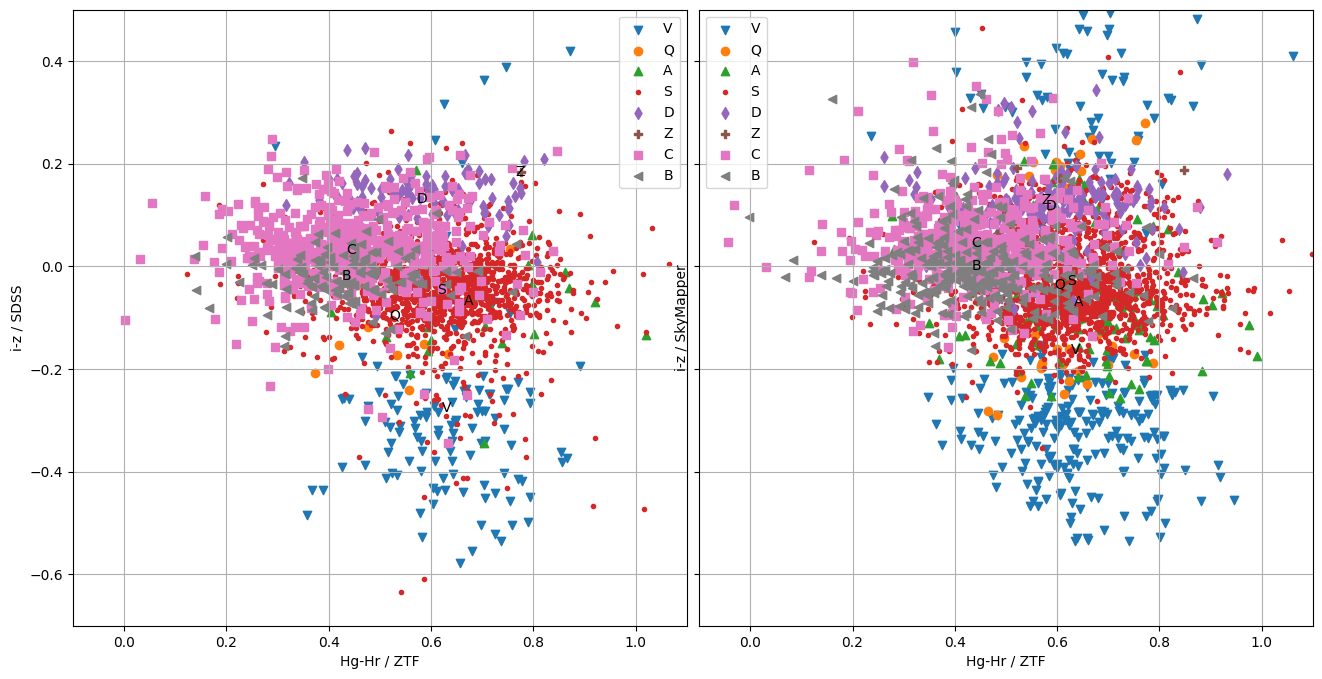

In [ ]:
fig, ax = plt.subplots(1, 2,
    figsize=(16, 8),
    sharex=True,
    sharey=True,
    gridspec_kw={"wspace": 0.02, "hspace": 0.02},
)


for a in ax:
    a.grid()

complexes = ["E", "V", "Q", "A", "S", "L", "K", "D", "M", "Z", "C", "B", "Ch", "P"]
complexes = ["V", "Q", "A", "S", "D", "Z", "C", "B"]
markers = ['v','o','^','.','d','P','s','<']
for i, c in enumerate(complexes):
    cond = (
        maskFINK
        & (data["taxonomy.complex"] == c)
        & ((data["sHG1G2_dH_g"] + data["sHG1G2_dH_r"]) < 0.3)
        & (data["colors.i-z.facility"] == "SDSS")
        & (data["colors.i-z.color.value"].notna())
    )
    x = data.loc[cond, "sHG1G2_H_g"] - data.loc[cond, "sHG1G2_H_r"]
    y = data.loc[cond, "colors.i-z.color.value"]
    print( c, len(data[cond]))
    ax[0].scatter(x, y, label=c, marker=markers[i] )


    ax[0].text(x.mean(), y.mean(), c, ha='center', va='center', color='black' )
    # axs[i].text( G1_m, G2_m, c, ha='center', va='center', color='white' )


ax[0].legend()
ax[0].set_xlabel("Hg-Hr / ZTF")
ax[0].set_ylabel("i-z / SDSS")
ax[0].set_xlim(-0.1, 1.1)
ax[0].set_ylim(-0.7, 0.5)


for i, c in enumerate(complexes):
    cond = (
        maskFINK
        & (data["taxonomy.complex"] == c)
        & ((data["sHG1G2_dH_g"] + data["sHG1G2_dH_r"]) < 0.3)
        & (data["colors.i-z.facility"] == "SMSS")
        & (data["colors.i-z.color.value"].notna())
    )
    x = data.loc[cond, "sHG1G2_H_g"] - data.loc[cond, "sHG1G2_H_r"]
    y = data.loc[cond, "colors.i-z.color.value"]
    print( c, len(data[cond]))
    ax[1].scatter(x, y, label=c, marker=markers[i] )


    ax[1].text(x.mean(), y.mean(), c, ha='center', va='center', color='black' )
    # axs[i].text( G1_m, G2_m, c, ha='center', va='center', color='white' )


ax[1].legend()
ax[1].set_xlabel("Hg-Hr / ZTF")
ax[1].set_ylabel("i-z / SkyMapper")
ax[1].set_xlim(-0.1, 1.1)
ax[1].set_ylim(-0.7, 0.5)
